
## IRIS FLOWER CLASSIFICATON
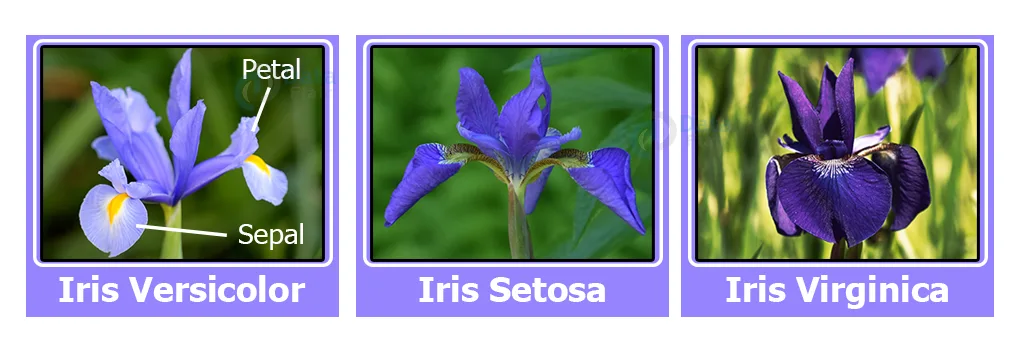


## Introduction
The Iris flower classification project aims to classify iris flowers into three species: Iris-setosa, Iris-versicolor, and Iris-virginica. This is done based on their sepal and petal measurements. The project uses a variety of machine learning techniques to accomplish this task.

## Importing Packages
We start by importing the necessary Python packages for data manipulation, visualization, and machine learning:


In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

* numpy: For numerical operations.
* matplotlib and seaborn: For data visualization.
* pandas: For data manipulation and analysis.

## Loading and Exploring the Data
The dataset is loaded using pandas and some basic exploration is performed:

In [ ]:
columns = ['Sepal length','Sepal width','Petal length','petal width','Class_labels']
df = pd.read_csv(r'Iris.csv',names=columns, header=0)

Shows the first 5 rows form the data set table

In [3]:
df.head()

,Sepal length,Sepal width,Petal length,petal width,Class_labels
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Sepal length,Sepal width,Petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


* df.head(): Displays the first few rows of the dataset.
* df.describe(): Provides summary statistics of the dataset.
* df.info(): Displays information about the dataset, including the data types and non-null values.

## Data Visualization
A pair plot is created to visualize the relationships between different features:

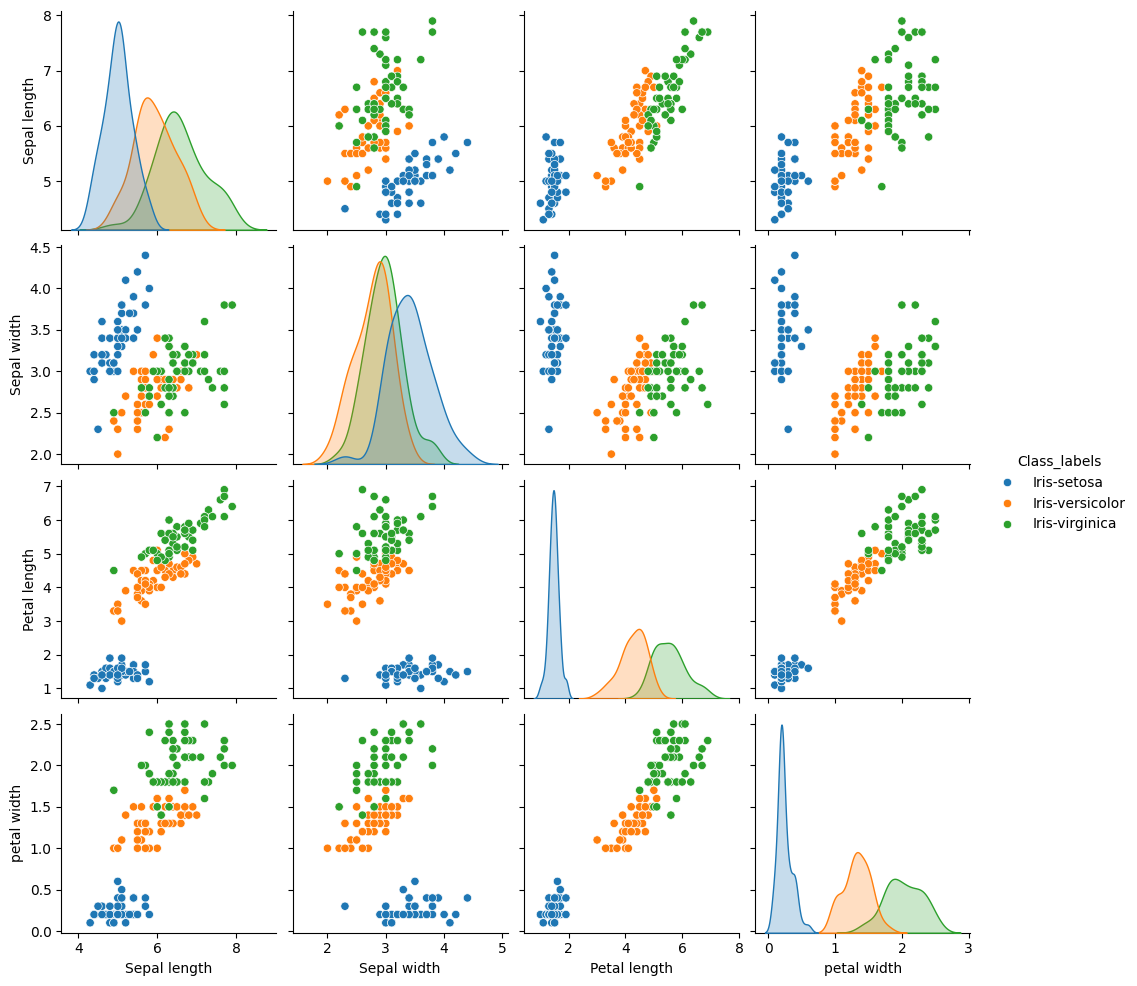

In [6]:
sns.pairplot(df, hue='Class_labels')


* sns.pairplot: Creates a pair plot of the dataset, colored by the class labels.

## Data Preparation
The data is split into features (X) and labels (Y):

In [7]:
data=df.values
X=data[:,0:4]
Y = data[:,4]

## Averaging Feature Values
Average feature values for each class are calculated:

In [8]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

* The above code calculates average feature values for each class and reshapes the data for further use.

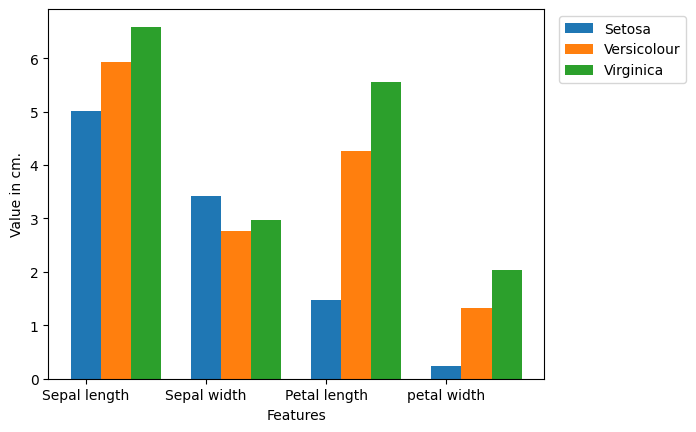

In [9]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

* Y_Data: Computes the average values for each feature for each class.
* Y_Data_reshaped: Reshapes and transposes the data for plotting.
* plt.bar: Creates a bar plot for visual comparison of features across species.

## Splitting Data into Training and Testing Sets
The dataset is split into training and testing sets:

In [10]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

* train_test_split: Splits the data into training (80%) and testing (20%) sets.

## Model Training and Prediction
The model is trained using Support Vector Machines (SVM):

In [11]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

* svm.SVC: Creates a support vector classifier.
* svn.fit: Trains the classifier using the training data.

## Predictions are made on the test dataset:

In [12]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

## Model Evaluation
The model's accuracy is evaluated, and a detailed classification report is generated:

In [13]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



* accuracy_score: Calculates the accuracy of the model.
* classification_report: Provides a detailed classification report, including precision, recall, and F1-score.

## Making New Predictions
The model is used to predict the species of new iris flowers based on their features:

In [14]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


* svn.predict: Predicts the class labels for new data points.

## Conclusion
This project demonstrates the process of loading data, visualizing it, preparing it for machine learning, training a model, making predictions, and evaluating the model's performance. The model used here is a Support Vector Machine (SVM), which is well-suited for classification tasks like this one. The visualization and evaluation steps help in understanding the model's effectiveness and areas for improvement.